<a href="https://colab.research.google.com/github/TariroSiphatisiwe/Contradictory-My-Dear-Watson/blob/main/Contradictory_%2CMy_Dear_Watson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 ><b><font color='#30595B'>Contradictory, My Dear Watson</font></b></h1>

<div><h2><b><font color='#C496A4'><span><font color='#30595B'>>>></font></span> BACKGROUND
</b></h2></div>



Imagine you have two sentences, like building blocks.

These are the three ways they could connect to create meaning:


<div><h3><b><font color='#30595B'>1. Entailment</b></h3></div>




This means one sentence NECESSARILY includes the meaning of the other.
In other words, if the first sentence is true, the second one MUST also be true.

<b>For example:</b>

Sentence 1: It is raining outside.

Sentence 2: The ground is wet.


If it's raining, then the ground will definitely get wet eventually.
The first sentence (raining) entails the second (wet ground).




<div><h3><b><font color='#30595B'>2. Contradiction</b></h3></div>



This is when the two sentences cannot both be true at the same time.
They completely oppose each other.

<b>For example:</b>

Sentence 1: The cat is on the mat.

Sentence 2: The cat is not on the mat.

These two sentences directly contradict each other. Only one can be true at a time.




<div><h3><b><font color='#30595B'>3. Unrelated</b></h3></div>



Sometimes, sentences cover completely different topics and have no bearing on each other.
They're like independent islands of information.

<b>For example:</b>

Sentence 1: I ate pizza for dinner.

Sentence 2: The Eiffel Tower is in Paris.




<div><h2><b><font color='#C496A4'><span><font color='#30595B'>>>></font></span> PROBLEM
</b></h2></div>


To create an <b>NLI model</b> that assigns labels of 0, 1, or 2 to pairs of premises and hypotheses.

<b>Premises:</b> It's a starting point, a statement that's generally considered true or accepted as a fact. It sets the stage for the next step.

<b>Hypotheses:</b> It's what you're trying to prove or disprove using the information in the premise. It's an idea that needs evidence to be confirmed as true or false.
```
0 == entailment
1 == neutral
2 == contradiction
```

<div><h2><b><font color='#C496A4'><span><font color='#30595B'>>>></font></span> DATA
</b></h2></div>

The data used in this Google Colab Notebook is from Kaggle's Contradictory, My Dear Watson
Competition.

[Kaggle Link](https://www.kaggle.com/competitions/contradictory-my-dear-watson/data)

Special thanks to Tensorflow Datasets (TFDS) for providing this and many other useful datasets! For more information, visit: https://www.tensorflow.org/datasets


<b>Disclaimer</b>: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.

* The train and test set include text in fifteen different languages.

* train.csv: This file contains the ID, premise, hypothesis, and label, as well as the language of the text and its two-letter abbreviation

* test.csv: This file contains the ID, premise, hypothesis, language, and language abbreviation, without labels.



In [3]:
!pip install dash
import pandas as pd # data processing, csv files, etc
import numpy as np #linear algebra
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
import zipfile
import sqlite3
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.4 MB/s eta 0:00:00


<ipython-input-3-c9491b267e2b>:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-3-c9491b267e2b>:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [4]:
#read data file from google drive
file_path = '/content/drive/MyDrive/Contradictory, My Dear Watson/contradictory-my-dear-watson.zip'

#Unzip file path using zipfile
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Contradictory, My Dear Watson/unzipped')


In [5]:
#read train data from unzipped file
#read test data from unzipped file

train_data = '/content/drive/MyDrive/Contradictory, My Dear Watson/unzipped/train.csv'
test_data = '/content/drive/MyDrive/Contradictory, My Dear Watson/unzipped/test.csv'

# read datasets as dataframes.

train_data = pd.read_csv(train_data)
test_data = pd.read_csv(test_data)

In [6]:
#read_csv files for train data
train_data.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [7]:
#Exploring the Dataset with graphs.

# Create a pie chart to represent the proportion of each language in the dataset.
# For each language show case the ratio of 012 e.g English
# check if all the ID's are unique


In [8]:
# Check if there are Duplicated Identifiers in the train_data csv file.


unique_ids = set(train_data['id'])
if len(unique_ids) == len(train_data):
    print("Dataset has unique identifiers")
else:
    print("Dataset has duplicate identifiers")

Dataset has unique identifiers


In [9]:
# Check Datatypes of Dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.2+ KB


In [10]:
train_data[['premise', 'hypothesis', 'lang_abv', 'language']].describe()

,premise,hypothesis,lang_abv,language
count,12120,12120,12120,12120
unique,8209,12119,15,15
top,and these comments were considered in formulat...,I am not sure.,en,English
freq,3,2,6870,6870


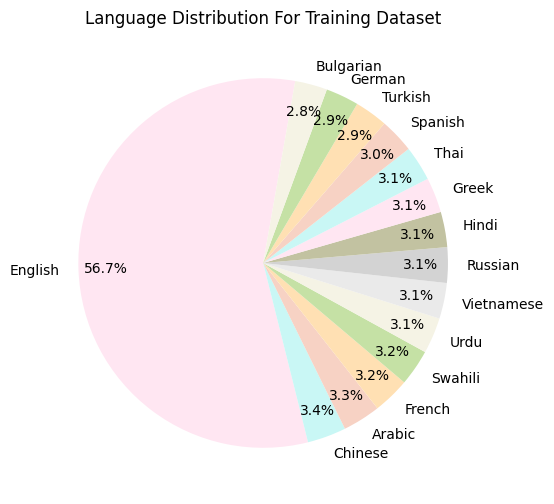

In [11]:
# Visualise the propotion of different languages for the dataset.
# Get the count of each Language.

language_counts = train_data['language'].value_counts()
#print(language_counts)

#Create a piechart

# Define a list of pastel colors
pastel_colors = ['#ffe6f2', '#c9f7f5', '#f7d2c4', '#ffe0b3', '#c5e1a5','#F5F3E5', '#EAEAEA', '#D3D3D3', '#C2C2A1']  # Add more colors as needed

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(language_counts, labels=language_counts.index, autopct=lambda p : '{:.1f}%'.format(p),
        pctdistance=0.85, labeldistance=1.1, startangle=80, colors=pastel_colors)
plt.title('Language Distribution For Training Dataset')
plt.show()

In [12]:
# For each language show case the ratio of 012 e.g English
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='dropdown',
        options=[{'label': i, 'value': i} for i in df.columns]
    ),
    dcc.Graph(id='graph')
])

@app.callback(
    Output('graph', 'figure'),
    [Input('dropdown', 'value')]
)
def update_graph(selected_column):
    fig = px.scatter(df, x='x', y=selected_column)
    return fig

if __name__ == '__main__':
    app.run_server()

NameError: name 'df' is not defined